# RANDOM FOREST

In [1]:
from pandas import read_csv
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn import metrics
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
company = read_csv('Company_Data.csv')

In [3]:
company

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [4]:
company.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [5]:
company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [6]:
company.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


# Converting sales(numeric data) to catgorical

In [7]:
company['sales']=pd.cut(company["Sales"],bins=[0, 5.39 , 9.32 , 16.27],labels=[0,1,2])

company.drop(['Sales'], axis=1, inplace=True)

In [8]:
company['sales'].unique()

[2, 1, 0, NaN]
Categories (3, int64): [0 < 1 < 2]

In [9]:
company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   CompPrice    400 non-null    int64   
 1   Income       400 non-null    int64   
 2   Advertising  400 non-null    int64   
 3   Population   400 non-null    int64   
 4   Price        400 non-null    int64   
 5   ShelveLoc    400 non-null    object  
 6   Age          400 non-null    int64   
 7   Education    400 non-null    int64   
 8   Urban        400 non-null    object  
 9   US           400 non-null    object  
 10  sales        399 non-null    category
dtypes: category(1), int64(7), object(3)
memory usage: 31.9+ KB


In [10]:
company.isnull().sum()

CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
sales          1
dtype: int64

In [11]:
company.dropna(inplace=True)

In [12]:
company.isnull().sum()

CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
sales          0
dtype: int64

In [13]:
label_encoder = preprocessing.LabelEncoder()
company['ShelveLoc']= label_encoder.fit_transform(company['ShelveLoc'])

In [14]:
company

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,sales
0,138,73,11,276,120,0,42,17,Yes,Yes,2
1,111,48,16,260,83,1,65,10,Yes,Yes,2
2,113,35,10,269,80,2,59,12,Yes,Yes,2
3,117,100,4,466,97,2,55,14,Yes,Yes,1
4,141,64,3,340,128,0,38,13,Yes,No,0
...,...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,1,33,14,Yes,Yes,2
396,139,23,3,37,120,2,55,11,No,Yes,1
397,162,26,12,368,159,2,40,18,Yes,Yes,1
398,100,79,7,284,95,0,50,12,Yes,Yes,1


In [15]:
company.iloc[:,-1].value_counts()

1    201
0     99
2     99
Name: sales, dtype: int64

In [16]:
import pandas as pd
company=pd.get_dummies(company,columns=['Urban','US'], drop_first=True)
company

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,sales,Urban_Yes,US_Yes
0,138,73,11,276,120,0,42,17,2,1,1
1,111,48,16,260,83,1,65,10,2,1,1
2,113,35,10,269,80,2,59,12,2,1,1
3,117,100,4,466,97,2,55,14,1,1,1
4,141,64,3,340,128,0,38,13,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,1,33,14,2,1,1
396,139,23,3,37,120,2,55,11,1,0,1
397,162,26,12,368,159,2,40,18,1,1,1
398,100,79,7,284,95,0,50,12,1,1,1


# Outlier detection using isoation forest

In [17]:
from sklearn.ensemble import IsolationForest

In [18]:
company_copy=company.copy()
data_encoded= pd.get_dummies(company_copy)

In [19]:
data_encoded

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban_Yes,US_Yes,sales_0,sales_1,sales_2
0,138,73,11,276,120,0,42,17,1,1,0,0,1
1,111,48,16,260,83,1,65,10,1,1,0,0,1
2,113,35,10,269,80,2,59,12,1,1,0,0,1
3,117,100,4,466,97,2,55,14,1,1,0,1,0
4,141,64,3,340,128,0,38,13,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,1,33,14,1,1,0,0,1
396,139,23,3,37,120,2,55,11,0,1,0,1,0
397,162,26,12,368,159,2,40,18,1,1,0,1,0
398,100,79,7,284,95,0,50,12,1,1,0,1,0


In [20]:
# Training the data using model isolation forest for outlier detection

In [21]:
clf=IsolationForest(random_state=10,contamination=.01)
clf.fit(data_encoded)

IsolationForest(contamination=0.01, random_state=10)

In [22]:
#predictions
y_pred_outliers=clf.predict(data_encoded)

In [23]:
data_encoded

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban_Yes,US_Yes,sales_0,sales_1,sales_2
0,138,73,11,276,120,0,42,17,1,1,0,0,1
1,111,48,16,260,83,1,65,10,1,1,0,0,1
2,113,35,10,269,80,2,59,12,1,1,0,0,1
3,117,100,4,466,97,2,55,14,1,1,0,1,0
4,141,64,3,340,128,0,38,13,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,1,33,14,1,1,0,0,1
396,139,23,3,37,120,2,55,11,0,1,0,1,0
397,162,26,12,368,159,2,40,18,1,1,0,1,0
398,100,79,7,284,95,0,50,12,1,1,0,1,0


In [24]:
data_encoded['scores']=clf.decision_function(data_encoded)
data_encoded['anomaly']=clf.predict(data_encoded.iloc[:,0:13])
data_encoded

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban_Yes,US_Yes,sales_0,sales_1,sales_2,scores,anomaly
0,138,73,11,276,120,0,42,17,1,1,0,0,1,0.108972,1
1,111,48,16,260,83,1,65,10,1,1,0,0,1,0.089347,1
2,113,35,10,269,80,2,59,12,1,1,0,0,1,0.110087,1
3,117,100,4,466,97,2,55,14,1,1,0,1,0,0.148376,1
4,141,64,3,340,128,0,38,13,1,0,1,0,0,0.077490,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,1,33,14,1,1,0,0,1,0.099497,1
396,139,23,3,37,120,2,55,11,0,1,0,1,0,0.072173,1
397,162,26,12,368,159,2,40,18,1,1,0,1,0,0.073615,1
398,100,79,7,284,95,0,50,12,1,1,0,1,0,0.113677,1


In [25]:
#print the outlier data points
data_encoded[data_encoded['anomaly']==-1]


,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban_Yes,US_Yes,sales_0,sales_1,sales_2,scores,anomaly
42,77,69,0,25,24,2,50,18,1,0,0,0,1,-0.024098,-1
75,88,111,23,480,92,0,36,16,0,1,0,1,0,-0.029259,-1
125,89,78,0,181,49,2,43,15,0,0,0,0,1,-0.005110,-1
229,98,104,0,404,72,2,27,18,0,0,0,0,1,-0.010151,-1


In [26]:
company.drop([42,75,125,229] ,inplace=True)
company

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,sales,Urban_Yes,US_Yes
0,138,73,11,276,120,0,42,17,2,1,1
1,111,48,16,260,83,1,65,10,2,1,1
2,113,35,10,269,80,2,59,12,2,1,1
3,117,100,4,466,97,2,55,14,1,1,1
4,141,64,3,340,128,0,38,13,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,1,33,14,2,1,1
396,139,23,3,37,120,2,55,11,1,0,1
397,162,26,12,368,159,2,40,18,1,1,1
398,100,79,7,284,95,0,50,12,1,1,1


In [27]:
X=company.iloc[:,[0,1,2,3,4,5,7,9,10]]
Y=company.iloc[:,-3]


In [28]:
X

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Education,Urban_Yes,US_Yes
0,138,73,11,276,120,0,17,1,1
1,111,48,16,260,83,1,10,1,1
2,113,35,10,269,80,2,12,1,1
3,117,100,4,466,97,2,14,1,1
4,141,64,3,340,128,0,13,1,0
...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,1,14,1,1
396,139,23,3,37,120,2,11,0,1
397,162,26,12,368,159,2,18,1,1
398,100,79,7,284,95,0,12,1,1


In [29]:
Y

0      2
1      2
2      2
3      1
4      0
      ..
395    2
396    1
397    1
398    1
399    2
Name: sales, Length: 395, dtype: category
Categories (3, int64): [0 < 1 < 2]

In [30]:
X=(X-X.min(axis=0))/(X.max(axis=0)-X.min(axis=0))

In [31]:
X

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Education,Urban_Yes,US_Yes
0,0.588889,0.525253,0.379310,0.533066,0.485507,0.0,0.875,1.0,1.0
1,0.288889,0.272727,0.551724,0.501002,0.217391,0.5,0.000,1.0,1.0
2,0.311111,0.141414,0.344828,0.519038,0.195652,1.0,0.250,1.0,1.0
3,0.355556,0.797980,0.137931,0.913828,0.318841,1.0,0.500,1.0,1.0
4,0.622222,0.434343,0.103448,0.661323,0.543478,0.0,0.375,1.0,0.0
...,...,...,...,...,...,...,...,...,...
395,0.588889,0.878788,0.586207,0.386774,0.543478,0.5,0.500,1.0,1.0
396,0.600000,0.020202,0.103448,0.054108,0.485507,1.0,0.125,0.0,1.0
397,0.855556,0.050505,0.413793,0.717435,0.768116,1.0,1.000,1.0,1.0
398,0.166667,0.585859,0.241379,0.549098,0.304348,0.0,0.250,1.0,1.0


In [32]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,shuffle=True,random_state=40)

In [33]:
from sklearn.tree import DecisionTreeClassifier

In [34]:
model=DecisionTreeClassifier(criterion ='entropy' , max_depth=3)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

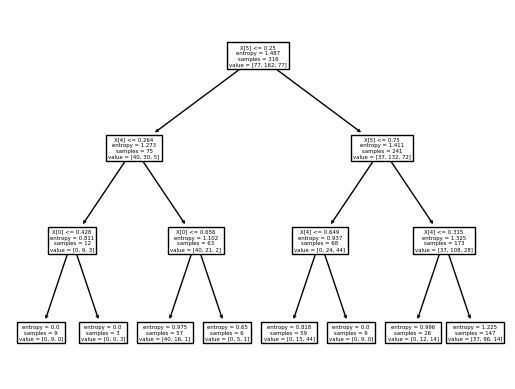

In [35]:
tree.plot_tree(model);

In [36]:
from sklearn import metrics
pred=model.predict(x_test)

In [37]:
y_test

145    1
138    2
79     1
237    2
120    1
      ..
70     2
298    2
388    1
375    1
289    1
Name: sales, Length: 79, dtype: category
Categories (3, int64): [0 < 1 < 2]

In [38]:
x_test.shape

(79, 9)

In [39]:
pred.shape

(79,)

In [40]:
pred

array([1, 1, 0, 1, 1, 2, 2, 0, 1, 1, 1, 1, 1, 0, 2, 2, 1, 0, 2, 2, 1, 0,
       2, 2, 1, 1, 1, 1, 0, 1, 0, 2, 1, 2, 1, 2, 2, 2, 1, 0, 2, 0, 2, 1,
       1, 0, 2, 2, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 2, 1, 1, 2, 2, 1,
       0, 1, 0, 1, 1, 2, 1, 1, 2, 2, 2, 1, 1], dtype=int64)

In [41]:
df=pd.DataFrame({'Actual values':y_test,'Predicted Values':pred})
df

,Actual values,Predicted Values
145,1,1
138,2,1
79,1,0
237,2,1
120,1,1
...,...,...
70,2,2
298,2,2
388,1,2
375,1,1


In [42]:
X

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Education,Urban_Yes,US_Yes
0,0.588889,0.525253,0.379310,0.533066,0.485507,0.0,0.875,1.0,1.0
1,0.288889,0.272727,0.551724,0.501002,0.217391,0.5,0.000,1.0,1.0
2,0.311111,0.141414,0.344828,0.519038,0.195652,1.0,0.250,1.0,1.0
3,0.355556,0.797980,0.137931,0.913828,0.318841,1.0,0.500,1.0,1.0
4,0.622222,0.434343,0.103448,0.661323,0.543478,0.0,0.375,1.0,0.0
...,...,...,...,...,...,...,...,...,...
395,0.588889,0.878788,0.586207,0.386774,0.543478,0.5,0.500,1.0,1.0
396,0.600000,0.020202,0.103448,0.054108,0.485507,1.0,0.125,0.0,1.0
397,0.855556,0.050505,0.413793,0.717435,0.768116,1.0,1.000,1.0,1.0
398,0.166667,0.585859,0.241379,0.549098,0.304348,0.0,0.250,1.0,1.0


In [43]:
Y

0      2
1      2
2      2
3      1
4      0
      ..
395    2
396    1
397    1
398    1
399    2
Name: sales, Length: 395, dtype: category
Categories (3, int64): [0 < 1 < 2]

In [44]:
Y.unique()

[2, 1, 0]
Categories (3, int64): [0 < 1 < 2]

In [45]:
fn=['CompPrice','Income','Advertising','Population','Price','Age','Education','Urban_Yes']
cn=['low','avg','high']
    
"""
 instead of using above
 
 target = list(df['Class Name'].unique())
 feature_names = list(X.columns)"""


"\n instead of using above\n \n target = list(df['Class Name'].unique())\n feature_names = list(X.columns)"

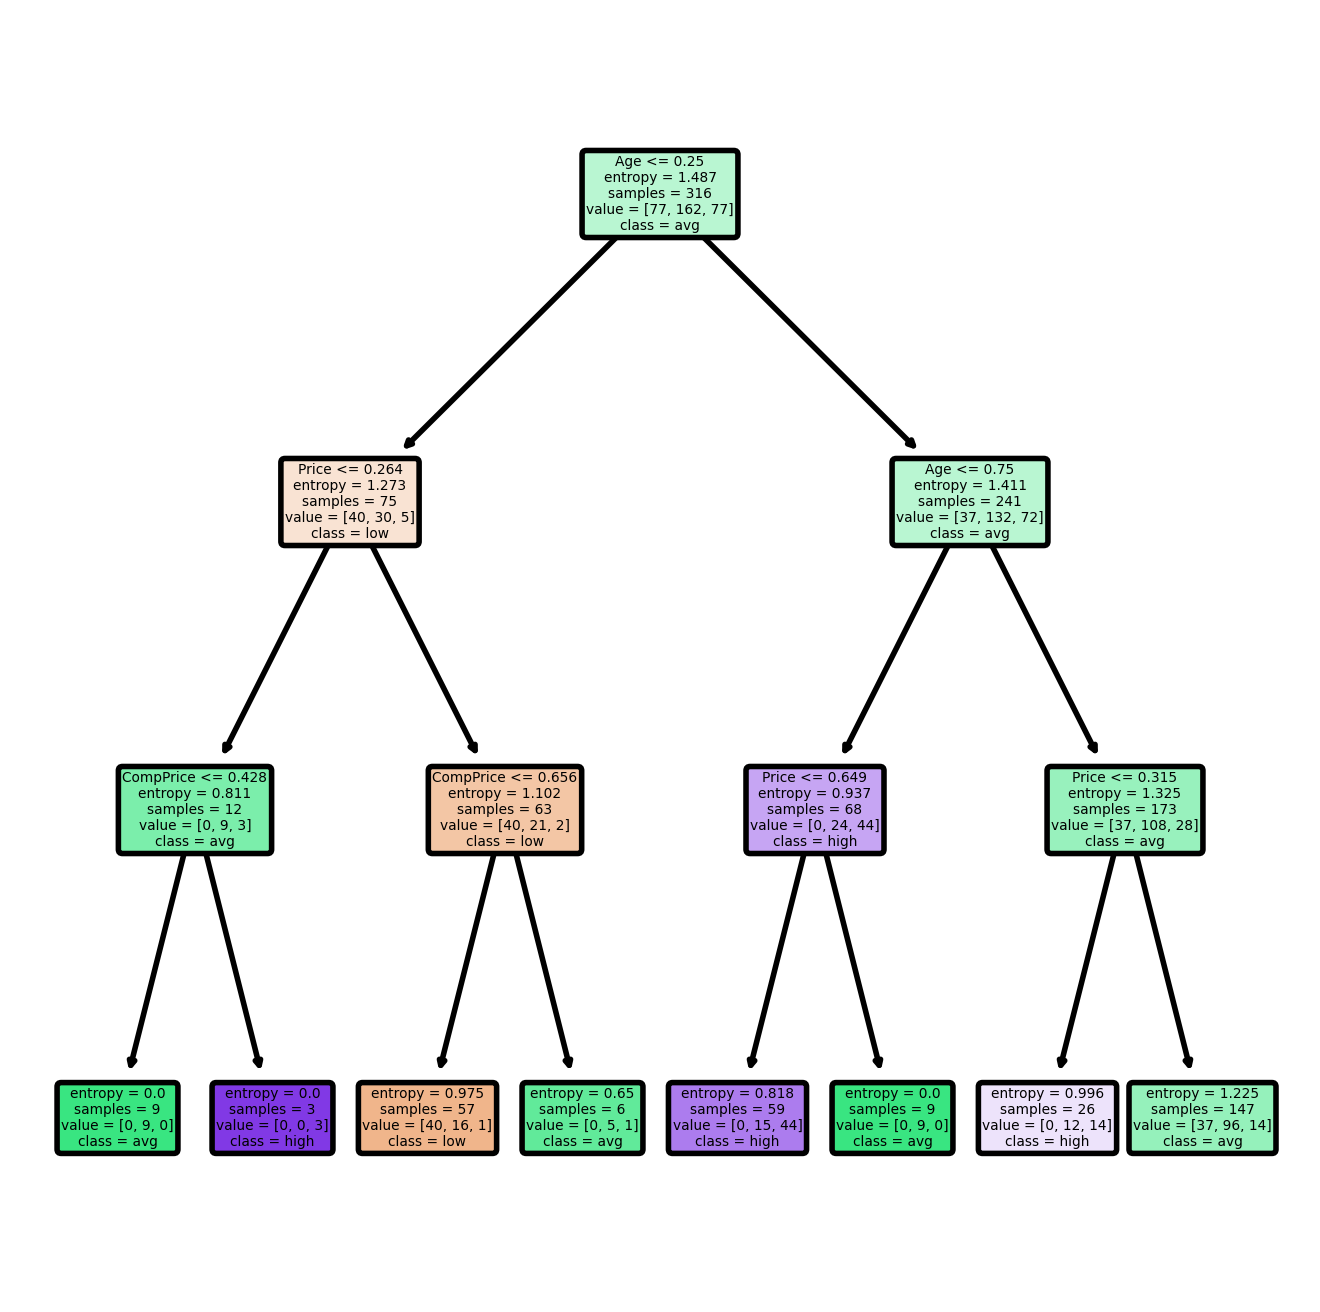

In [46]:
fig,axes =plt.subplots(figsize=(4,4),dpi=400)
tree.plot_tree(model,feature_names=fn,
class_names=cn,
filled=True,rounded=True);

In [47]:
pd.crosstab(y_test,pred) # getting the 2 way table to understand the correct and wrong predictions

col_0,0,1,2
sales,,,
0,10,11,1
1,6,22,10
2,0,6,13


In [48]:
y_test

145    1
138    2
79     1
237    2
120    1
      ..
70     2
298    2
388    1
375    1
289    1
Name: sales, Length: 79, dtype: category
Categories (3, int64): [0 < 1 < 2]

In [49]:
np.mean(pred==y_test)

0.569620253164557

In [50]:
from sklearn import metrics
metrics.accuracy_score(pred,y_test)

0.569620253164557

In [51]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.62      0.45      0.53        22
           1       0.56      0.58      0.57        38
           2       0.54      0.68      0.60        19

    accuracy                           0.57        79
   macro avg       0.58      0.57      0.57        79
weighted avg       0.58      0.57      0.57        79



# Building Decision Tree Classifier using Gini Criteria

In [52]:
model_gini=DecisionTreeClassifier(criterion='gini',max_depth=3)

In [53]:
model_gini.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3)

In [54]:
pred=model_gini.predict(x_test)

In [55]:
np.mean(pred==y_test)

0.5949367088607594

In [56]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.67      0.45      0.54        22
           1       0.58      0.66      0.62        38
           2       0.57      0.63      0.60        19

    accuracy                           0.59        79
   macro avg       0.61      0.58      0.59        79
weighted avg       0.60      0.59      0.59        79



# FEATURE IMPORTANCE FOR PREDICTION

In [57]:
import pandas as pd
feature_imp = pd.Series(model_gini.feature_importances_ ,index=X.columns)
feature_imp

CompPrice      0.093981
Income         0.000000
Advertising    0.000000
Population     0.044503
Price          0.374805
ShelveLoc      0.486710
Education      0.000000
Urban_Yes      0.000000
US_Yes         0.000000
dtype: float64

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


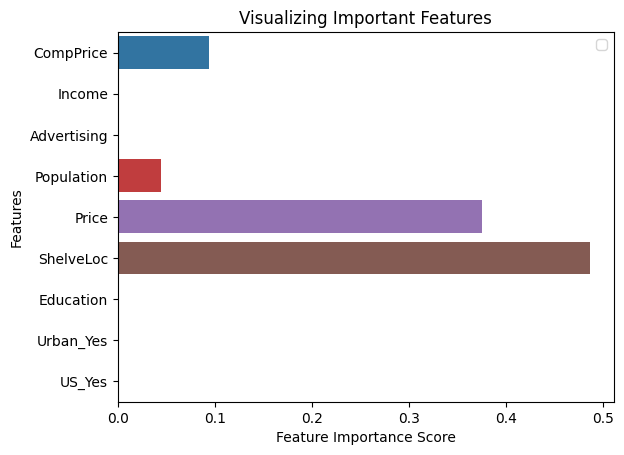

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y=X.columns)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

# ===========Building Random Forest
Model================

In [59]:
# Random Forest Classification
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
%matplotlib inline
num_trees = 100
max_features = 6
model = RandomForestClassifier(n_estimators=num_trees, max_samples=0.8,max_features=max_features,random_state=8)
results = cross_val_score(model, X, Y, cv=10)
print(results.mean())

0.6655769230769232


In [60]:
# choose k between 1 to 41
num_trees = [10,20,50,100,200,300,400,500]
nf=[2,3,4,5,6,7]
k_scores1 = []




# use iteration to caclulator different k in models,
#then return the average accuracy based on the cross validation

for k in num_trees:
    rf = RandomForestClassifier(criterion= "gini",max_samples=0.8,n_estimators=k,random_state=10)
    scores = cross_val_score(rf, X, Y, cv=10)
    k_scores1.append(scores.mean())

In [61]:
k_scores1

[0.6199358974358975,
 0.6503205128205128,
 0.6834615384615386,
 0.6858974358974359,
 0.6809615384615386,
 0.6732692307692308,
 0.6757692307692307,
 0.6707051282051283]

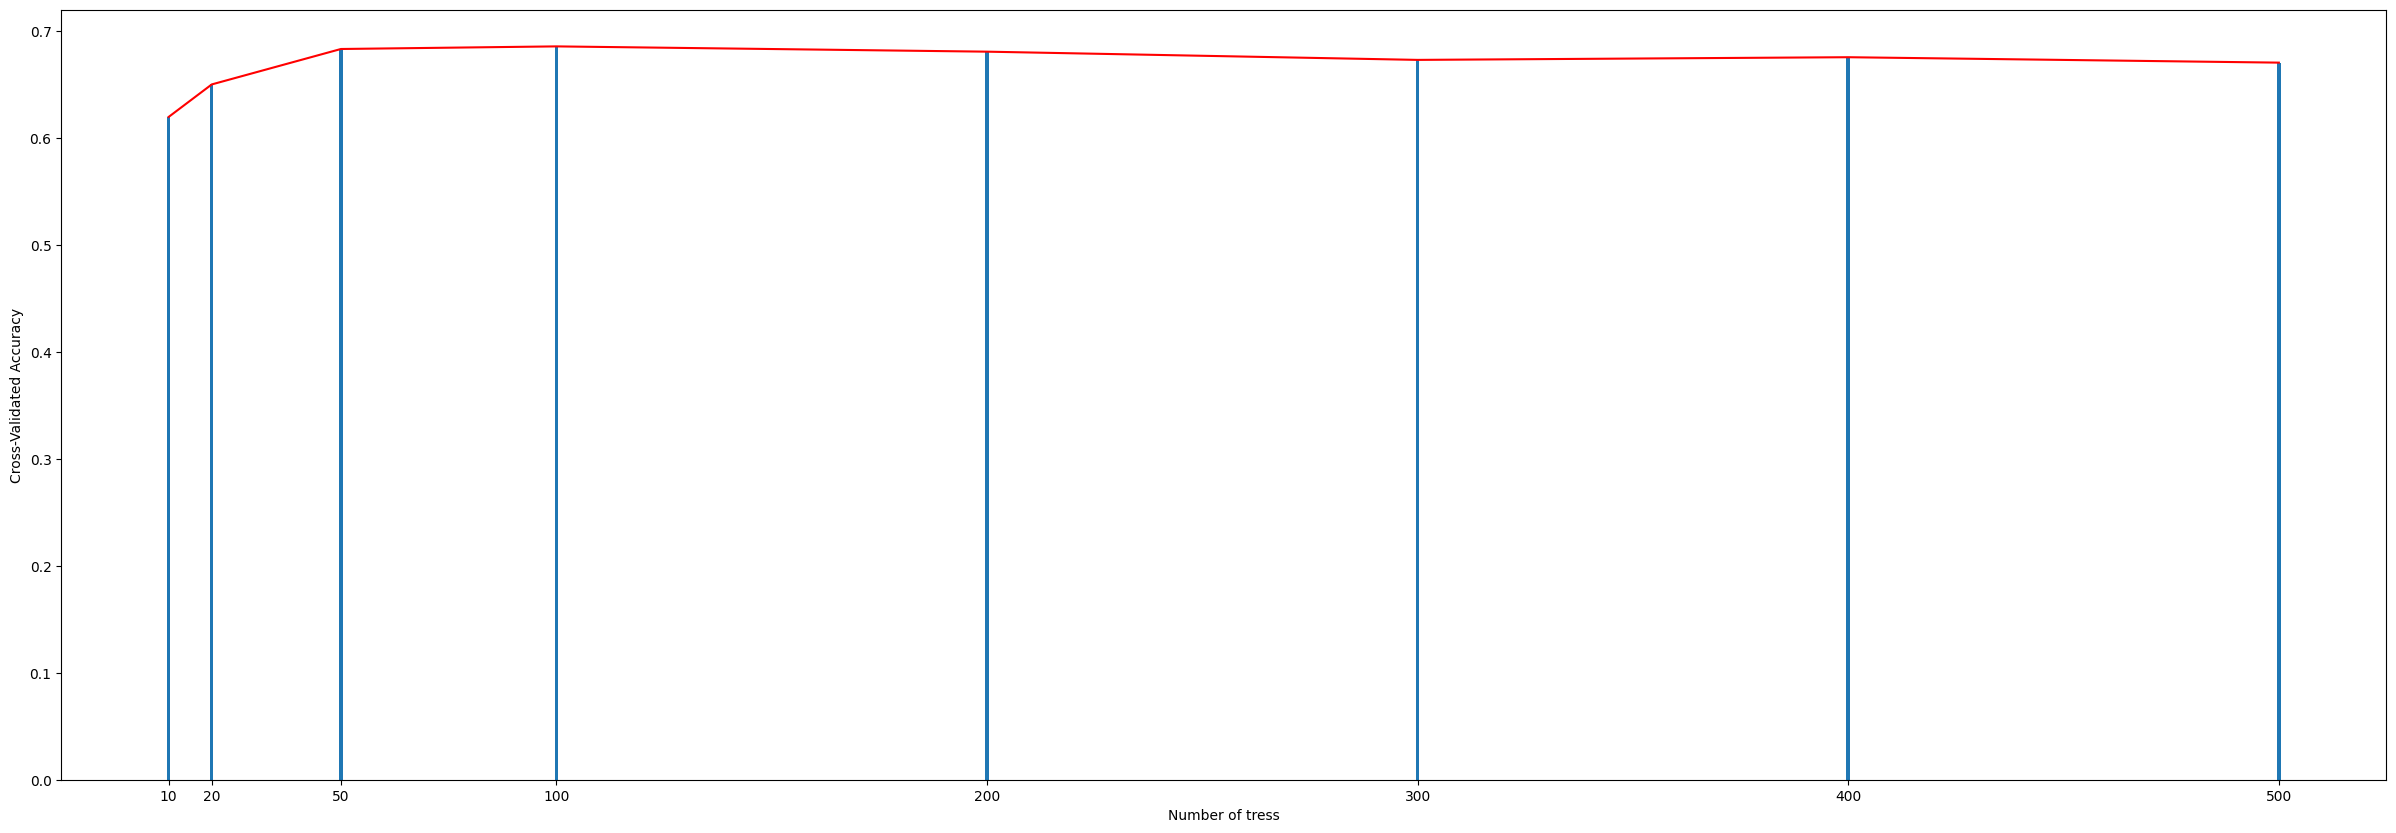

In [62]:
plt.figure(figsize=(30,10))
plt.bar(num_trees, k_scores1)
plt.plot(num_trees, k_scores1, color="red")
plt.xlabel('Number of tress')
plt.ylabel('Cross-Validated Accuracy')
plt.xticks(num_trees)
plt.show()

In [63]:
np.argmax(k_scores1)

3

In [64]:
num_trees[np.argmax(k_scores1)]

100

# From above select the best hyparameter and build model

In [72]:
num_trees = 100

model3 = RandomForestClassifier(n_estimators=num_trees,max_samples=0.8,criterion="gini",random_state=10)
results = cross_val_score(model3, X, Y, cv=10)
print(results.mean())


0.6858974358974359


In [73]:
model3.fit(x_train,y_train)

RandomForestClassifier(max_samples=0.8, random_state=10)

In [74]:
pred3=model3.predict(x_test)
pred3

array([1, 1, 1, 1, 1, 2, 1, 0, 1, 1, 1, 1, 0, 0, 1, 2, 1, 0, 2, 2, 1, 0,
       2, 1, 1, 2, 1, 1, 0, 2, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 2, 0, 2, 1,
       1, 0, 1, 2, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 2, 1, 2, 1, 1], dtype=int64)

In [75]:
np.mean(pred==y_test)

0.5949367088607594

In [76]:
metrics.accuracy_score(y_test,pred3)

0.6708860759493671

In [77]:
print(classification_report(y_test,pred3))

              precision    recall  f1-score   support

           0       0.75      0.55      0.63        22
           1       0.62      0.82      0.70        38
           2       0.77      0.53      0.62        19

    accuracy                           0.67        79
   macro avg       0.71      0.63      0.65        79
weighted avg       0.69      0.67      0.67        79



In [78]:
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
max_depth=None, max_features='auto', max_leaf_nodes=None,
min_impurity_decrease=0.0,
min_samples_leaf=1, min_samples_split=2,
min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
oob_score=False, random_state=None, verbose=0,
warm_start=False)

RandomForestClassifier(n_jobs=1)

# —:checking the accuracy based on selecting only important feature from above
graph

In [79]:
import pandas as pd
feature_imp = pd.Series(model3.feature_importances_ ,index=X.columns)
feature_imp

CompPrice      0.142158
Income         0.132986
Advertising    0.115234
Population     0.129905
Price          0.214556
ShelveLoc      0.137943
Education      0.088099
Urban_Yes      0.018574
US_Yes         0.020545
dtype: float64

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


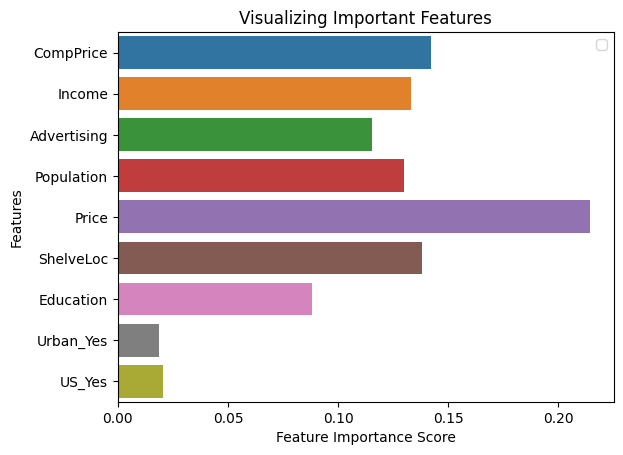

In [80]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y=X.columns)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

In [81]:
X=X.drop(["Urban_Yes","US_Yes"],axis=1)
X

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Education
0,0.588889,0.525253,0.379310,0.533066,0.485507,0.0,0.875
1,0.288889,0.272727,0.551724,0.501002,0.217391,0.5,0.000
2,0.311111,0.141414,0.344828,0.519038,0.195652,1.0,0.250
3,0.355556,0.797980,0.137931,0.913828,0.318841,1.0,0.500
4,0.622222,0.434343,0.103448,0.661323,0.543478,0.0,0.375
...,...,...,...,...,...,...,...
395,0.588889,0.878788,0.586207,0.386774,0.543478,0.5,0.500
396,0.600000,0.020202,0.103448,0.054108,0.485507,1.0,0.125
397,0.855556,0.050505,0.413793,0.717435,0.768116,1.0,1.000
398,0.166667,0.585859,0.241379,0.549098,0.304348,0.0,0.250


In [83]:
Y

0      2
1      2
2      2
3      1
4      0
      ..
395    2
396    1
397    1
398    1
399    2
Name: sales, Length: 395, dtype: category
Categories (3, int64): [0 < 1 < 2]

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2,random_state=5)

In [85]:
num_trees = 100
model4 = RandomForestClassifier(n_estimators=num_trees,max_samples=0.8,criterion="gini",random_state=10)
results = cross_val_score(model4, X, Y, cv=10)
print(results.mean())

0.6731410256410257


In [86]:
model4.fit(X_train,y_train)

RandomForestClassifier(max_samples=0.8, random_state=10)

In [87]:
pred4=model4.predict(X_test)

In [88]:
metrics.accuracy_score(y_test,pred4)

0.6835443037974683

In [89]:
print(classification_report(y_test,pred4))

              precision    recall  f1-score   support

           0       0.67      0.59      0.62        17
           1       0.67      0.84      0.75        44
           2       0.78      0.39      0.52        18

    accuracy                           0.68        79
   macro avg       0.71      0.61      0.63        79
weighted avg       0.70      0.68      0.67        79

